# Importing important libraries 

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pandas import read_csv
from pandas.plotting import scatter_matrix

from numpy import mean
from numpy import std

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier


from sklearn import model_selection
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


# Importing dataset 

In [128]:
# define the dataset location
df = pd.read_csv('../input/adult-census-income/adult.csv')
df.head()
# load the csv file as a data frame
#dataframe = read_csv(filename, header=None, na_values='?',names = column_names)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Drop missing values

In [129]:
# drop rows with missing
df = df.dropna()

In [130]:
# summarize the shape of the dataset
print(df.shape)

(32561, 15)


In [131]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [133]:
df.isnull().values.any()

False

# Classifying on the basis of income 

In [134]:
# summarize the class distribution
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=<=50K, Count=24720, Percentage=75.919%
Class=>50K, Count=7841, Percentage=24.081%


# count plot

1.Workclass

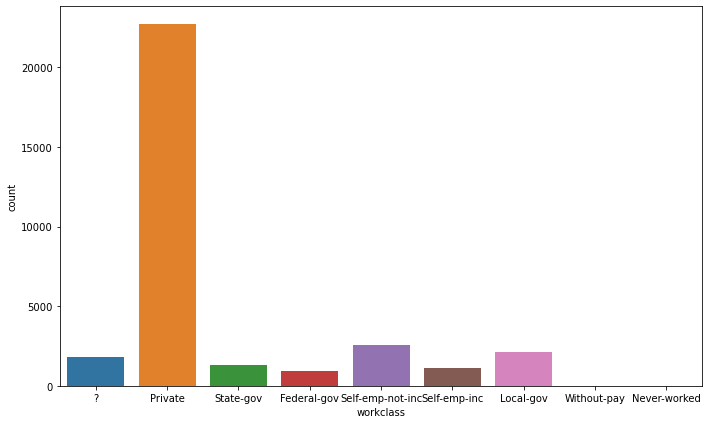

In [135]:
fig=plt.figure(figsize=(10,6))
sns.countplot('workclass',data=df )
plt.tight_layout()
plt.show()

2.Eduacation

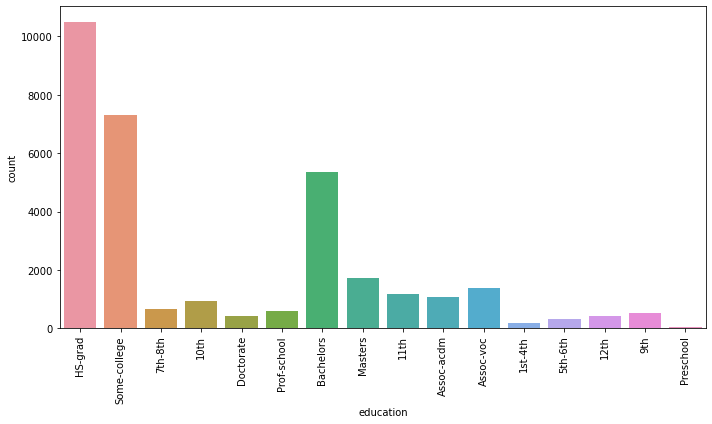

In [136]:
fig=plt.figure(figsize=(10,6))
sns.countplot('education',data=df )
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3.Marital Status 

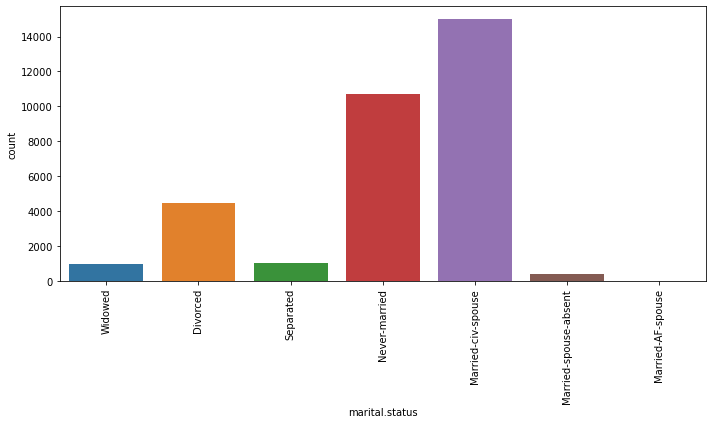

In [137]:
fig=plt.figure(figsize=(10,6))
sns.countplot('marital.status',data=df )
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

4.Occupation 

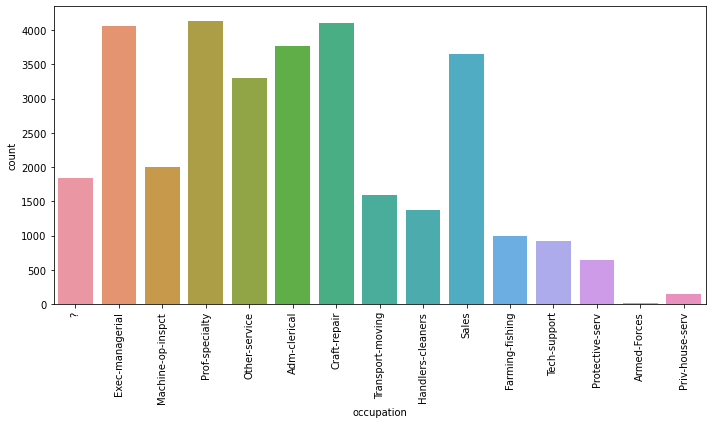

In [138]:
fig=plt.figure(figsize=(10,6))
sns.countplot('occupation',data=df )
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

5.sex

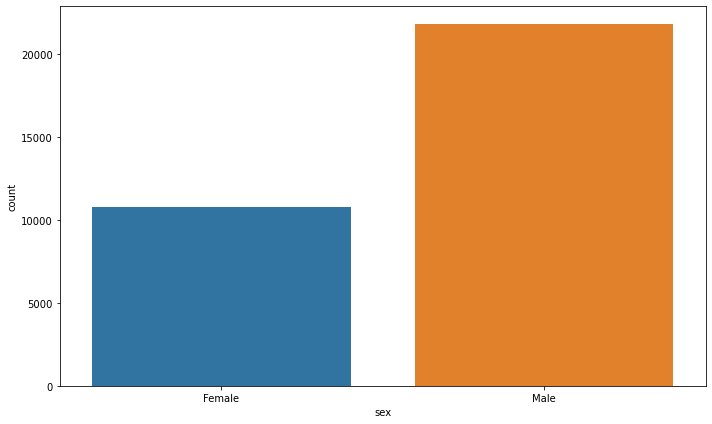

In [139]:
fig=plt.figure(figsize=(10,6))
sns.countplot('sex',data=df )
plt.tight_layout()
plt.show()

6.Race

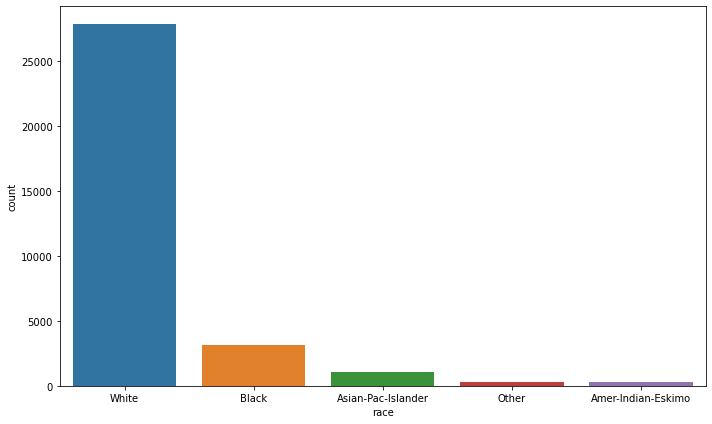

In [140]:
fig=plt.figure(figsize=(10,6))
sns.countplot('race',data=df )
plt.tight_layout()
plt.show()

# Box plot 

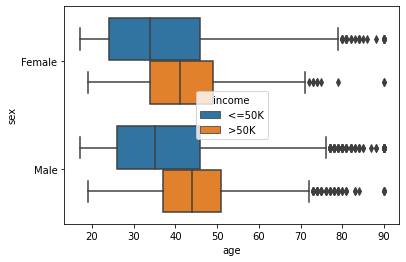

In [141]:
sns.boxplot(x="age",y="sex",hue="income",data=df)

# Heatmap 

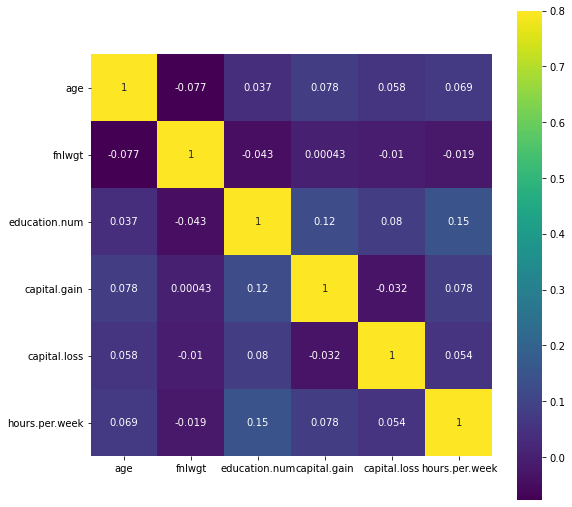

In [142]:
temp= df
temp["income"] = temp["income"].replace([' <=50K',' >50K' ] , [0,1] )
hmap = temp.corr()
plt.subplots(figsize=(9, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="viridis", square=True);

# Histograms of each features 

<Figure size 432x288 with 0 Axes>

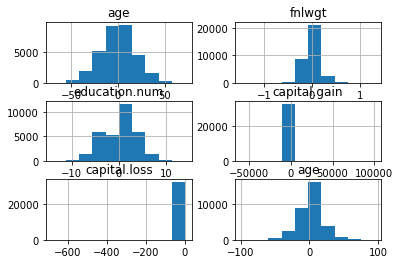

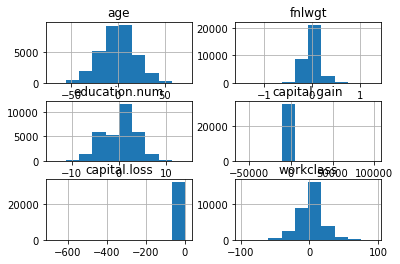

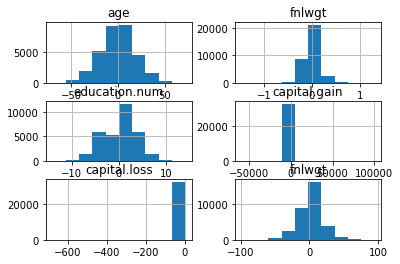

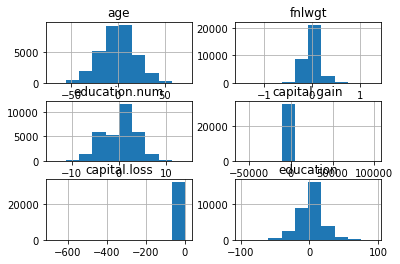

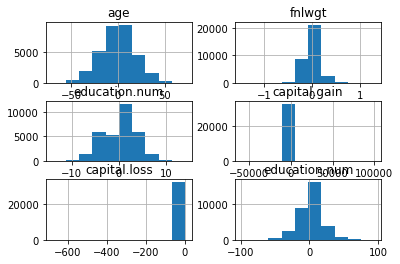

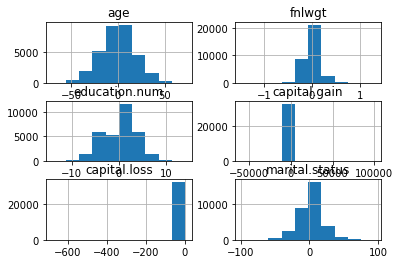

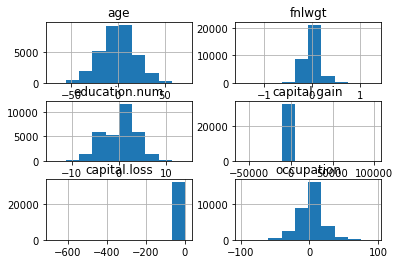

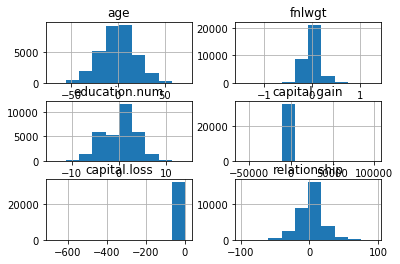

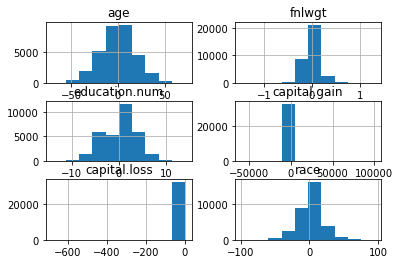

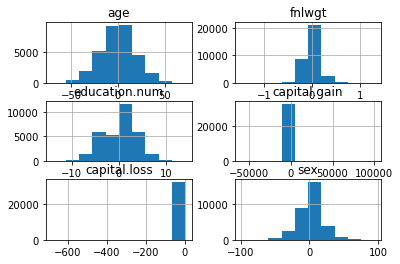

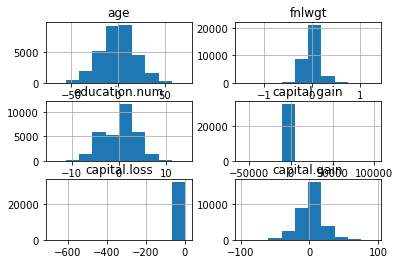

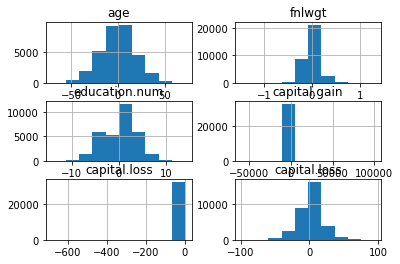

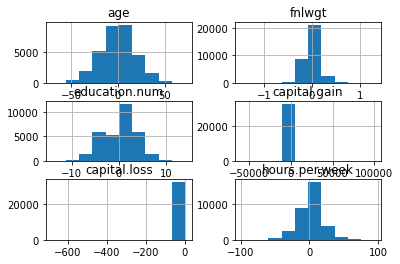

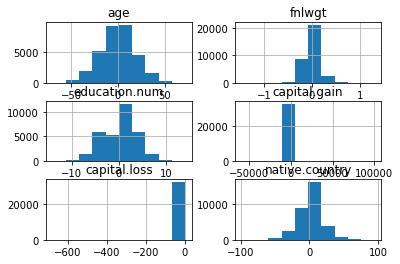

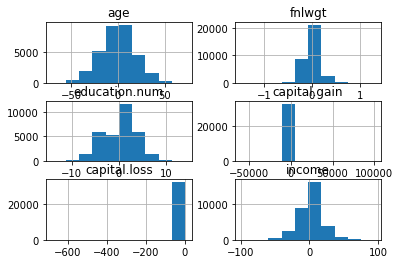

In [143]:
#making histograms of each feature
plt.figure()

for item in df:
    x.diff().hist()
    plt.title(item)
    plt.show()

# Pairplot 

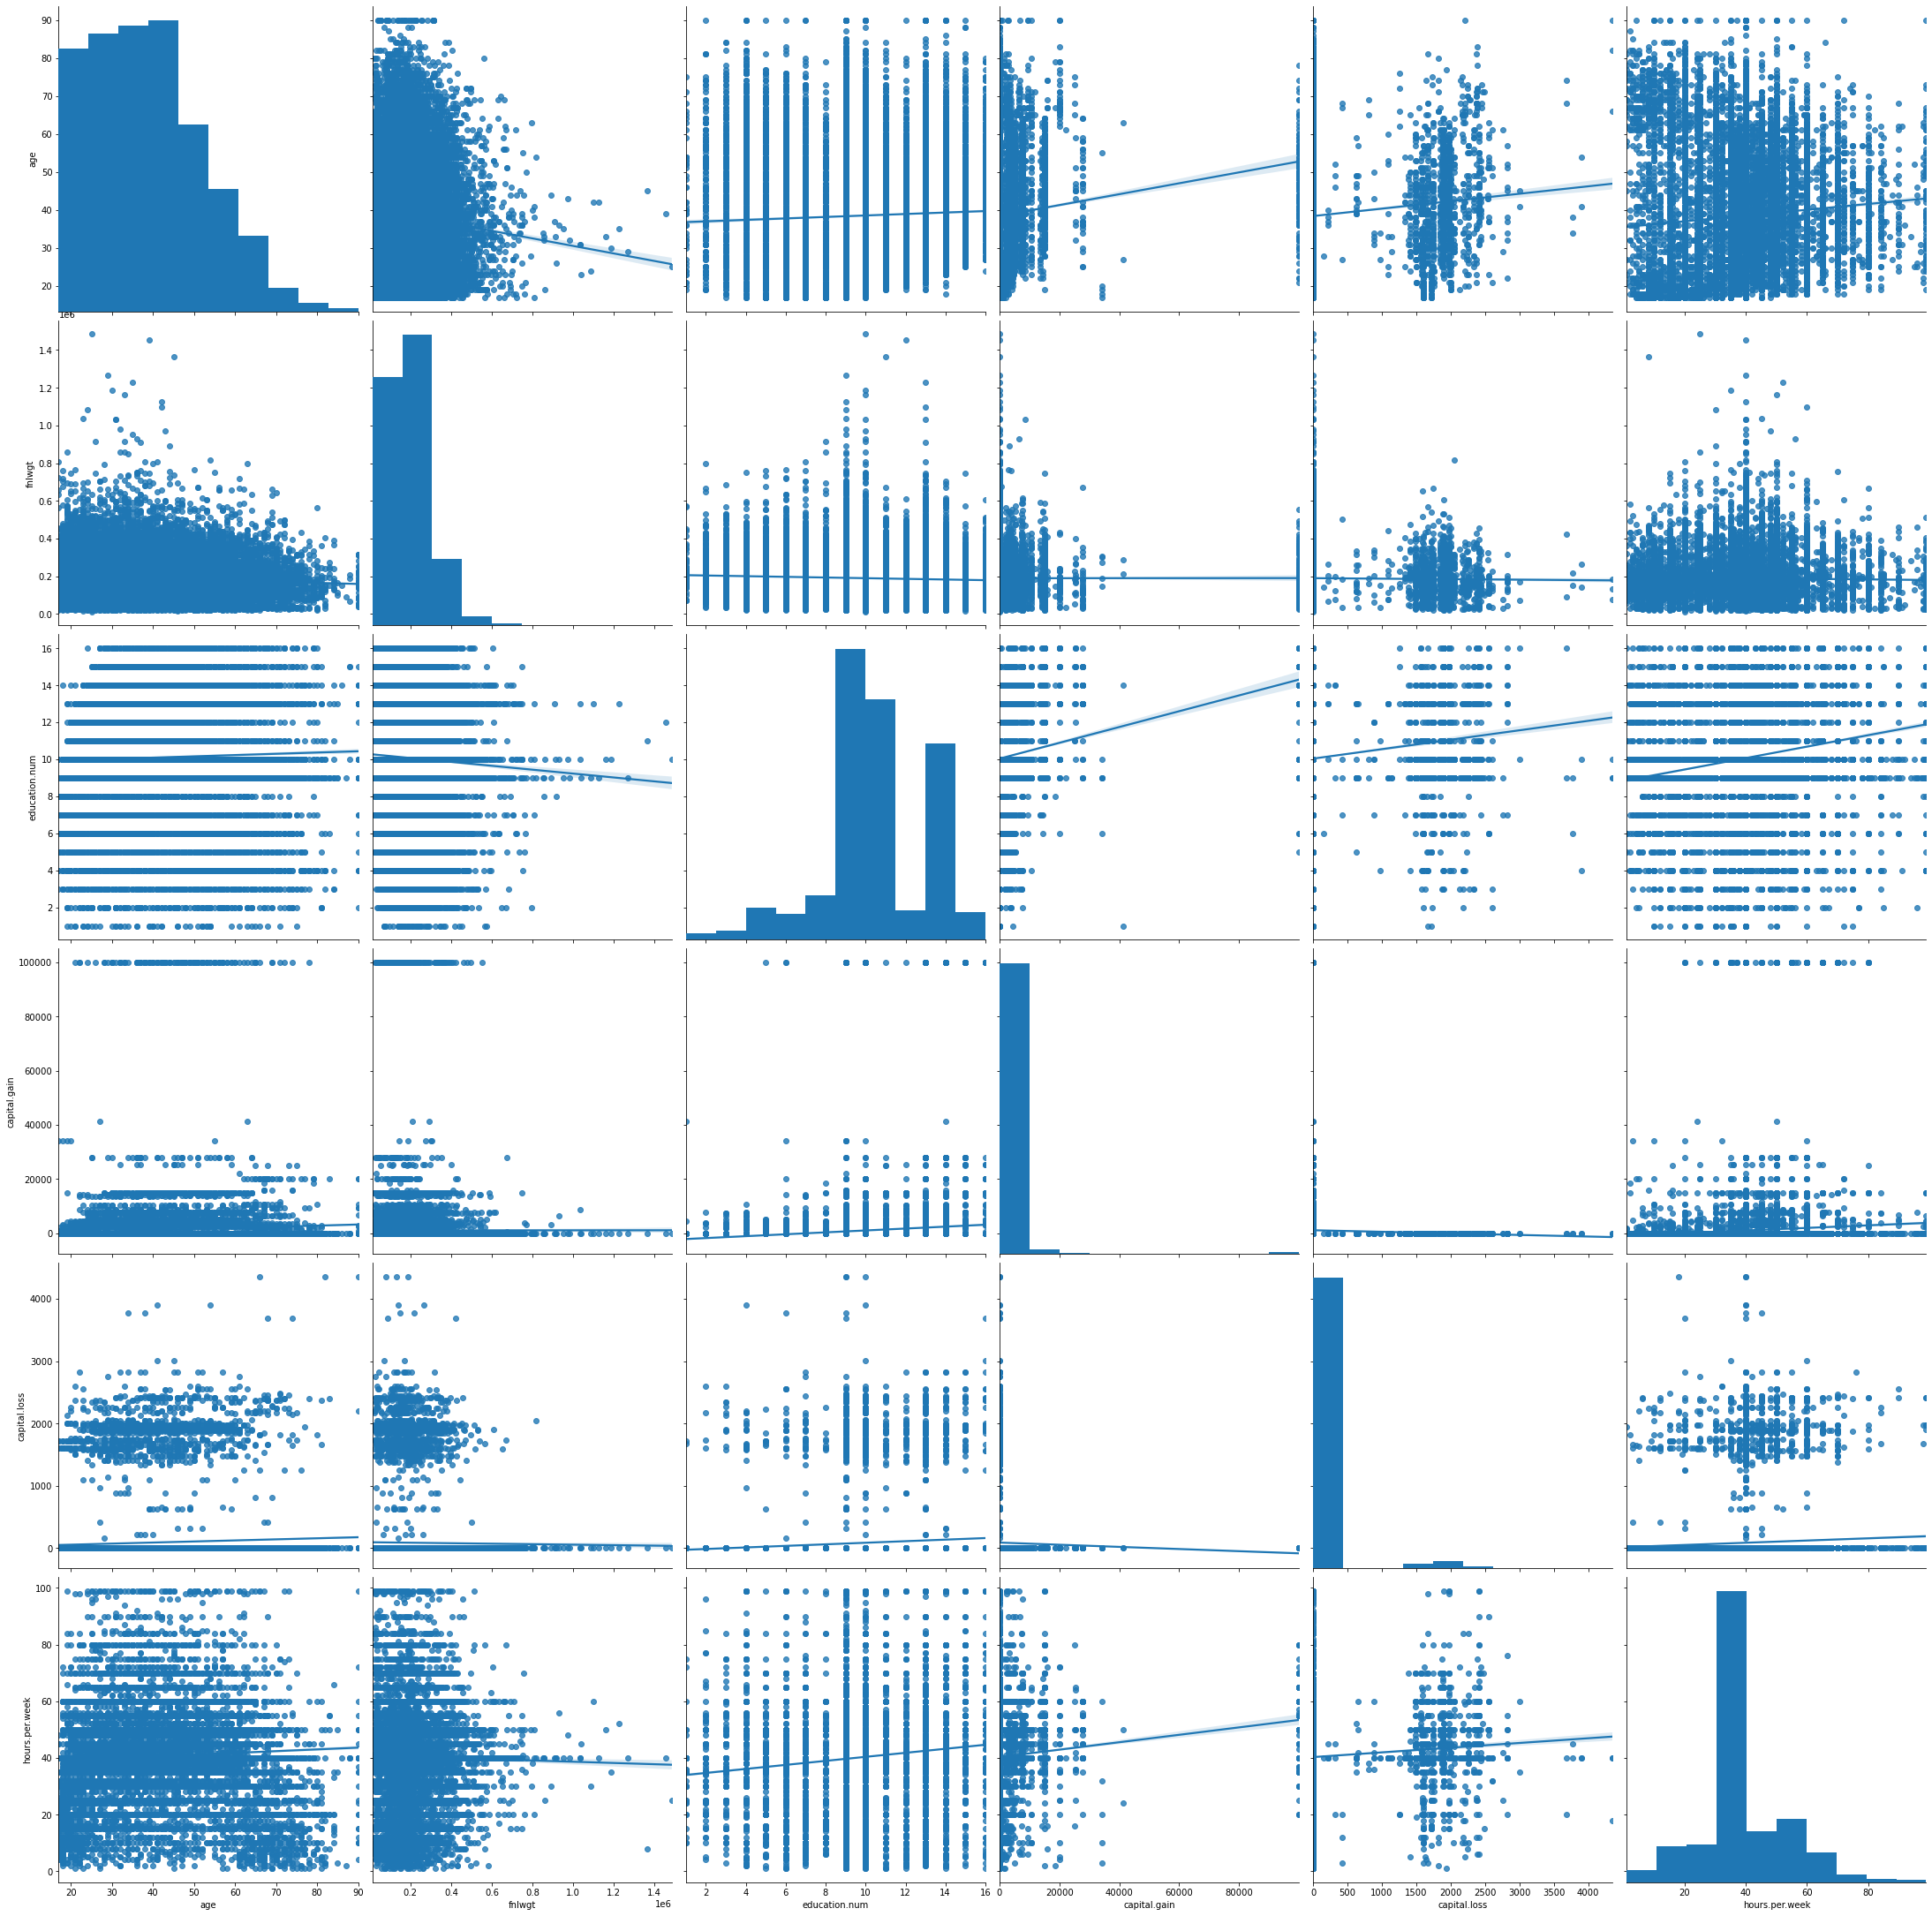

In [144]:
sns.pairplot(data=df,kind='reg',size=5)

In [145]:
df=df.dropna()

# classifying input and output 

In [146]:
x = df.drop(['income','workclass','education','marital.status','occupation','relationship','race','sex','native.country'],axis=1)
y= df['income']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [147]:
cat_ix = x.select_dtypes(include=['object', 'bool']).columns 
num_ix = x.select_dtypes(include=['int64', 'float64']).columns 
# label encode the target variable to have the classes 0 and 1
y = LabelEncoder().fit_transform(y)

# Cross Validation 

In [148]:
seed=101
models = []
models.append(('RF',RandomForestClassifier()))
models.append(('SGDC',SGDClassifier()))
models.append (('CART',DecisionTreeClassifier()))
models.append (('BAG',BaggingClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('GBM',GradientBoostingClassifier()))
results = []
names = []
for name, model in models:
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train,scoring='accuracy',cv=cv,n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.806979 (0.007775)
SGDC: 0.751979 (0.136875)
CART: 0.768983 (0.008842)
BAG: 0.809801 (0.006022)
LR: 0.797429 (0.004880)
GBM: 0.839476 (0.005630)


# 1.Logistic Regression 

In [149]:
from sklearn.metrics import classification_report, confusion_matrix
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)
print(classification_report(y_test,y_pred))
accuracy1=logistic.score(x_test,y_test)
print (accuracy1*100,'%')

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      7411
        >50K       0.72      0.26      0.39      2358

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.79      0.80      0.76      9769

79.80345992425018 %


# 2.Decision Tree Classifier 

In [150]:
des_class=DecisionTreeClassifier()
des_class.fit(x_train,y_train)
des_predict=des_class.predict(x_test)
print(classification_report(y_test,des_predict))
accuracy3=des_class.score(x_test,y_test)
print(accuracy3*100,'%')

              precision    recall  f1-score   support

       <=50K       0.85      0.85      0.85      7411
        >50K       0.53      0.53      0.53      2358

    accuracy                           0.77      9769
   macro avg       0.69      0.69      0.69      9769
weighted avg       0.77      0.77      0.77      9769

77.43883713788514 %


# 3.Bagging Classifier 

In [151]:
Bag=BaggingClassifier()
Bag.fit(x_train,y_train)
Bag_predict=Bag.predict(x_test)
print(classification_report(y_test,Bag_predict))
accuracy3=Bag.score(x_test,y_test)
print(accuracy3*100,'%')

              precision    recall  f1-score   support

       <=50K       0.84      0.91      0.88      7411
        >50K       0.63      0.47      0.54      2358

    accuracy                           0.81      9769
   macro avg       0.74      0.69      0.71      9769
weighted avg       0.79      0.81      0.80      9769

80.61214044426247 %


# 4.Random Forest classifier 

In [152]:
from sklearn.ensemble import RandomForestClassifier 
ran_class=RandomForestClassifier()
ran_class.fit(x_train,y_train)
ran_predict=ran_class.predict(x_test)
print(classification_report(y_test,ran_predict))
accuracy3=ran_class.score(x_test,y_test)
print(accuracy3*100,'%')

              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      7411
        >50K       0.64      0.50      0.56      2358

    accuracy                           0.81      9769
   macro avg       0.74      0.71      0.72      9769
weighted avg       0.80      0.81      0.80      9769

81.09325417135838 %


# 5.SGD Classifier

In [153]:
Sgdc=SGDClassifier()
Sgdc.fit(x_train,y_train)
Sgdc_predict=Sgdc.predict(x_test)
print(classification_report(y_test,Sgdc_predict))
accuracy3=Sgdc.score(x_test,y_test)
print(accuracy3*100,'%')

              precision    recall  f1-score   support

       <=50K       0.00      0.00      0.00      7411
        >50K       0.24      1.00      0.39      2358

    accuracy                           0.24      9769
   macro avg       0.12      0.50      0.19      9769
weighted avg       0.06      0.24      0.09      9769

24.137578053024875 %


# 6.Gradient Boosting Classifier 

In [154]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_predict=gbc.predict(x_test)
print(classification_report(y_test,gbc_predict))
accuracy3=gbc.score(x_test,y_test)
print(accuracy3*100,'%')

              precision    recall  f1-score   support

       <=50K       0.85      0.97      0.90      7411
        >50K       0.81      0.46      0.58      2358

    accuracy                           0.84      9769
   macro avg       0.83      0.71      0.74      9769
weighted avg       0.84      0.84      0.83      9769

84.21537516634251 %
